# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
##############################
#                            #
#  Homework 6 - Python API   #
#  Student - Matheus Gratz   #
#  Part I - Weather PY       #
##############################

#### Import Dependencies

In [2]:
import random
import requests
import json

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from citipy import citipy
from api_keys import w_key, g_key
from IPython.display import clear_output

plt.style.use('ggplot')

#### Generate Cities List

In [3]:
#Set ranges of latitude and longitude
lat_range = [-90, 90]
long_range = [-180, +180]

#Create a random uniform distribution
lat = np.random.uniform(low=lat_range[0], high=lat_range[-1], size=2000)
long = np.random.uniform(low=long_range[0], high=long_range[-1], size=2000)

#Zip Lat and Long
lat_long_zip = zip(lat, long)

#Create an empty dictionary to store everything
cities_dict = {
    "City ID" : "",
    "City Name" : [],
    "Country": "",
    "Latitude" : [],
    "Longitude" : [],
    "Hemisphere" : "",
    "Temperature (F)": "",
    "Humidity (%)" : "",
    "Cloudiness (%)" : "",
    "Wind Speed (mph)" : "",
}

# Identify nearest city for coordinate
for coord in lat_long_zip:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    

    # If the city is not in the list, add it
    if city not in cities_dict["City Name"]:
        cities_dict["City Name"].append(city)
        cities_dict["Latitude"].append(coord[0])
        cities_dict["Longitude"].append(coord[1])
            
        if len(cities_dict["City Name"]) == 600:
            break

print(f'There are {len(cities_dict["City Name"])} diferent cities on the dictionary!')

There are 600 diferent cities on the dictionary!


In [4]:
#Transform the dictionary to Data Frame
weather_df = pd.DataFrame(cities_dict)
weather_df.head()

,City ID,City Name,Country,Latitude,Longitude,Hemisphere,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,,hermanus,,-34.954779,19.428117,,,,,
1,,yellowknife,,80.071224,-109.975498,,,,,
2,,dikson,,84.065778,75.265209,,,,,
3,,sitka,,49.538623,-139.584339,,,,,
4,,albany,,-63.847564,101.960834,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

total_cities = len(cities_dict["City Name"])
count_ok = 0
count_nok = 0


for index, row in weather_df.iterrows():
    
    #Get city name
    city = row["City Name"]
    
    # Build query URL
    query_url = url + "appid=" + w_key + "&q=" + city + '&units=' + units
    
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
   
    try:
        #Store Data
        weather_df.loc[index, "Country"] = weather_json['sys']['country']
        weather_df.loc[index, "City ID"] = weather_json['id']
        weather_df.loc[index, "Temperature (F)"] = weather_json['main']['temp']
        weather_df.loc[index, "Humidity (%)"] = weather_json['main']['humidity']
        weather_df.loc[index, "Cloudiness (%)"] = weather_json['clouds']['all']
        weather_df.loc[index, "Wind Speed (mph)"] = weather_json['wind']['speed']
        weather_df.loc[index, "Latitude"] = weather_json['coord']['lat']
        weather_df.loc[index, "Longitude"] = weather_json['coord']['lon']
        
        if weather_df.loc[index, "Latitude"] <= 0:
            weather_df.loc[index, "Hemisphere"] = "South"
        else:
            weather_df.loc[index, "Hemisphere"] = "North"        
        
        count_ok += 1
        
    except KeyError:
        count_nok += 1
        weather_df.loc[index, "City ID"] = np.nan
        
    clear_output(wait=True)
    print('----------------------------')
    print(f'Iteration {count_ok+count_nok} of {total_cities} - City {city}')
    print(f'Total Cities with data : {count_ok}')
    print(f'Total Cities without data: {count_nok} \n% of cities with data {round(count_ok/total_cities*100)}%')
    
print('----------------------------')
weather_df.head(10)


----------------------------
Iteration 600 of 600 - City gillette
Total Cities with data : 547
Total Cities without data: 53 
% of cities with data 91%
----------------------------


,City ID,City Name,Country,Latitude,Longitude,Hemisphere,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,3366880,hermanus,ZA,-34.42,19.23,South,55,95,30,5.99
1,6185377,yellowknife,CA,62.46,-114.35,North,50.41,57,20,6.93
2,1507390,dikson,RU,73.51,80.55,North,41.14,84,1,10.22
3,5557293,sitka,US,57.05,-135.33,North,53.6,93,90,3.36
4,5106841,albany,US,42.60,-73.97,North,72.55,91,100,4.59
5,3874787,punta arenas,CL,-53.15,-70.92,South,35.29,88,28,6.93
6,1182872,bhag,PK,29.04,67.82,North,92.1,43,0,5.73
7,964432,port alfred,ZA,-33.59,26.89,South,61.68,39,0,11.45
8,7671223,kloulklubed,PW,7.04,134.26,North,89.6,66,75,8.05
9,3628473,san cristobal,VE,7.77,-72.22,North,73.4,94,75,2.24


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Drop rows without data
weather_df.dropna(inplace=True)

#Convert to CSV
weather_df.to_csv('output_data/weather_data.csv', index=False)

In [7]:
#Display Dataframe
weather_df

,City ID,City Name,Country,Latitude,Longitude,Hemisphere,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,3366880,hermanus,ZA,-34.42,19.23,South,55,95,30,5.99
1,6185377,yellowknife,CA,62.46,-114.35,North,50.41,57,20,6.93
2,1507390,dikson,RU,73.51,80.55,North,41.14,84,1,10.22
3,5557293,sitka,US,57.05,-135.33,North,53.6,93,90,3.36
4,5106841,albany,US,42.60,-73.97,North,72.55,91,100,4.59
...,...,...,...,...,...,...,...,...,...,...
595,3424901,aasiaat,GL,68.71,-52.87,North,30.81,98,85,4.34
596,2063042,port hedland,AU,-20.32,118.57,South,89.6,32,32,11.41
597,2156927,moree,AU,-29.47,149.85,South,77,33,0,14.99
598,1684606,taganak,PH,6.08,118.30,North,87.4,66,40,4.7


## Inspect the data and remove the cities where the humidity >= 100%.
----
Skip this step if there are no cities that have humidity >= 100%. 

In [8]:
humidity_weather_df = weather_df.loc[weather_df['Humidity (%)'] >= 100]
humidity_weather_df

,City ID,City Name,Country,Latitude,Longitude,Hemisphere,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
58,3430863,mar del plata,AR,-38.00,-57.56,South,46.6,100,90,13.87
86,3556437,jaguey grande,CU,22.53,-81.13,North,75.2,100,40,3.36
117,1490256,talnakh,RU,69.49,88.40,North,41,100,97,17.9
178,5122534,jamestown,US,42.10,-79.24,North,66.29,100,1,6.93
202,3395981,maceio,BR,-9.67,-35.74,South,66.2,100,20,3.36
214,3175096,lasa,IT,46.62,10.70,North,44.6,100,5,3.36
227,613918,khobi,GE,42.32,41.90,North,69.8,100,90,4.7
229,4956335,yarmouth,US,41.71,-70.23,North,71.37,100,90,9.17
234,1244926,hambantota,LK,6.12,81.12,North,78.8,100,40,4.7
269,6144312,sept-iles,CA,50.20,-66.38,North,53.82,100,90,8.05


In [9]:
#  Get the indices of cities that have humidity over 100%
list_index = humidity_weather_df.index.values.tolist()
print('Cities index with humidity >= 100%')
print(list_index, end='')

Cities index with humidity >= 100%
[58, 86, 117, 178, 202, 214, 227, 229, 234, 269, 285, 296, 328, 333, 408, 438, 450, 461, 471, 487, 504, 544]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_df.loc[weather_df['Humidity (%)'] < 100]
clean_weather_df

,City ID,City Name,Country,Latitude,Longitude,Hemisphere,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,3366880,hermanus,ZA,-34.42,19.23,South,55,95,30,5.99
1,6185377,yellowknife,CA,62.46,-114.35,North,50.41,57,20,6.93
2,1507390,dikson,RU,73.51,80.55,North,41.14,84,1,10.22
3,5557293,sitka,US,57.05,-135.33,North,53.6,93,90,3.36
4,5106841,albany,US,42.60,-73.97,North,72.55,91,100,4.59
...,...,...,...,...,...,...,...,...,...,...
595,3424901,aasiaat,GL,68.71,-52.87,North,30.81,98,85,4.34
596,2063042,port hedland,AU,-20.32,118.57,South,89.6,32,32,11.41
597,2156927,moree,AU,-29.47,149.85,South,77,33,0,14.99
598,1684606,taganak,PH,6.08,118.30,North,87.4,66,40,4.7


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

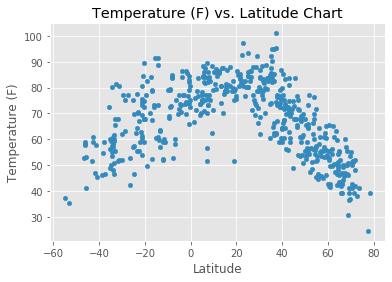

In [11]:
clean_weather_df.plot(kind='scatter', x='Latitude', y='Temperature (F)', title='Temperature (F) vs. Latitude Chart')
plt.savefig('output_data/lat_vs_temp_scatter.png')
plt.show()

We can see there is a relation between Latitude and Temperature.
The chart looks simetric at latitude 0~25.

## Latitude vs. Humidity Plot

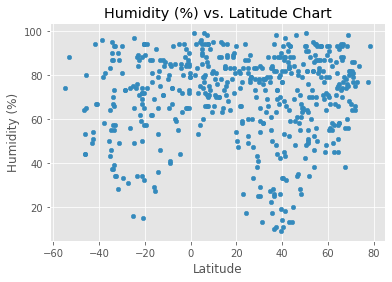

In [12]:
clean_weather_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Humidity (%) vs. Latitude Chart')
plt.savefig('output_data/lat_vs_humidity_scatter.png')
plt.show()

It seems that there is no relationship between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

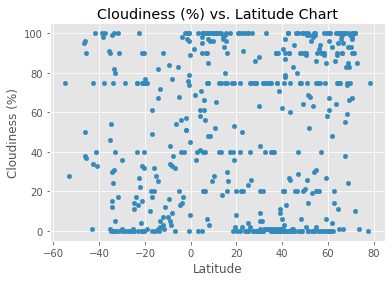

In [13]:
clean_weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Cloudiness (%) vs. Latitude Chart')
plt.savefig('output_data/lat_vs_cloud_scatter.png')
plt.show()

It seems that there is no relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

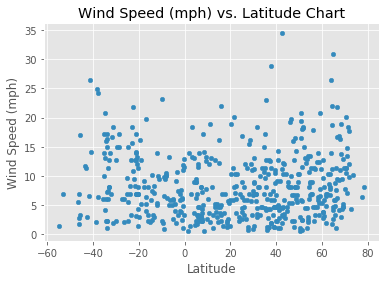

In [14]:
clean_weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', title='Wind Speed (mph) vs. Latitude Chart')
plt.savefig('output_data/lat_vs_wind_scatter.png')
plt.show()

It seems that there is no relationship between Latitude and wind speed

---

## Linear Regression

In [15]:
#Check df types
clean_weather_df.dtypes

City ID              object
City Name            object
Country              object
Latitude            float64
Longitude           float64
Hemisphere           object
Temperature (F)      object
Humidity (%)         object
Cloudiness (%)       object
Wind Speed (mph)     object
dtype: object

In [16]:
#Convert dtypes from object to float
clean_weather_df[['Temperature (F)', 'Humidity (%)', 'Cloudiness (%)',
       'Wind Speed (mph)']] = clean_weather_df[['Temperature (F)', 'Humidity (%)', 'Cloudiness (%)',
       'Wind Speed (mph)']].astype(float)

C:\Users\3647507\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
#Check if everything is ok
clean_weather_df.dtypes

City ID              object
City Name            object
Country              object
Latitude            float64
Longitude           float64
Hemisphere           object
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [18]:
#Create a dataframe for NORTHERN hemispheres
north_df = clean_weather_df[clean_weather_df["Hemisphere"] == "North"]
north_df.head()

,City ID,City Name,Country,Latitude,Longitude,Hemisphere,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,6185377,yellowknife,CA,62.46,-114.35,North,50.41,57.0,20.0,6.93
2,1507390,dikson,RU,73.51,80.55,North,41.14,84.0,1.0,10.22
3,5557293,sitka,US,57.05,-135.33,North,53.60,93.0,90.0,3.36
4,5106841,albany,US,42.60,-73.97,North,72.55,91.0,100.0,4.59
6,1182872,bhag,PK,29.04,67.82,North,92.10,43.0,0.0,5.73


In [19]:
#Create a dataframe for SOUTHERN hemispheres
south_df = clean_weather_df[clean_weather_df["Hemisphere"] == "South"]
south_df.head()

,City ID,City Name,Country,Latitude,Longitude,Hemisphere,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,3366880,hermanus,ZA,-34.42,19.23,South,55.00,95.0,30.0,5.99
5,3874787,punta arenas,CL,-53.15,-70.92,South,35.29,88.0,28.0,6.93
7,964432,port alfred,ZA,-33.59,26.89,South,61.68,39.0,0.0,11.45
16,3897774,buin,CL,-33.73,-70.75,South,50.88,66.0,31.0,2.24
17,6201424,mataura,NZ,-46.19,168.86,South,57.76,44.0,50.0,2.82


---

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Temperature (F) and Latitude) is -0.77
--------------------------


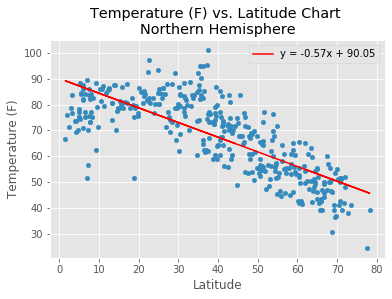

In [20]:
temp_n = north_df['Temperature (F)']
lat_n = north_df['Latitude']

correlation = st.pearsonr(lat_n, temp_n)

print('--------------------------')
print(f"The correlation between both factors (Temperature (F) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_n, temp_n)
regress_values = lat_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_df.plot(kind='scatter', x='Latitude', y='Temperature (F)', 
             title='Temperature (F) vs. Latitude Chart \nNorthern Hemisphere')    

plt.plot(lat_n, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_temp_regresion_northern.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Temperature (F) and Latitude) is 0.62
--------------------------


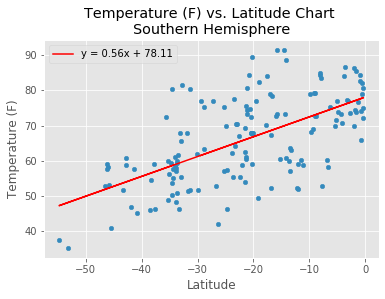

In [21]:
temp_s = south_df['Temperature (F)']
lat_s = south_df['Latitude']

correlation = st.pearsonr(lat_s, temp_s)

print('--------------------------')
print(f"The correlation between both factors (Temperature (F) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_s, temp_s)
regress_values = lat_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_df.plot(kind='scatter', x='Latitude', y='Temperature (F)', 
             title='Temperature (F) vs. Latitude Chart \nSouthern Hemisphere')    

plt.plot(lat_s, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_temp_regresion_southern.png')
plt.show()

On the northern hemisphere, there is a correlation around 0.75 (1 = best) between the temperature and latitute.
On the southern, there is a correlation, less than northern, of 0.63 (1 = best) between temperature and latitude.

---

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Humidity (%) and Latitude) is -0.05
--------------------------


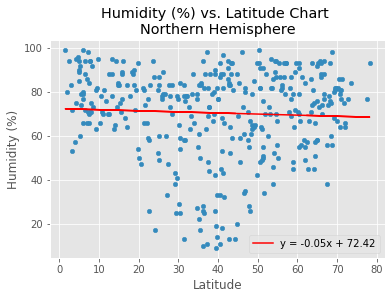

In [22]:
hum_n = north_df['Humidity (%)']
lat_n = north_df['Latitude']

correlation = st.pearsonr(lat_n, hum_n)

print('--------------------------')
print(f"The correlation between both factors (Humidity (%) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_n, hum_n)
regress_values = lat_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
             title='Humidity (%) vs. Latitude Chart \nNorthern Hemisphere')    

plt.plot(lat_n, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_humi_regresion_northern.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Humidity (%) and Latitude) is 0.21
--------------------------


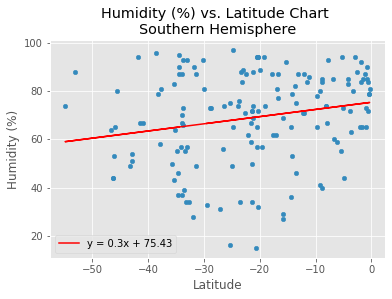

In [23]:
hum_s = south_df['Humidity (%)']
lat_s = south_df['Latitude']

correlation = st.pearsonr(lat_s, hum_s)

print('--------------------------')
print(f"The correlation between both factors (Humidity (%) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_s, hum_s)
regress_values = lat_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
             title='Humidity (%) vs. Latitude Chart \nSouthern Hemisphere')    

plt.plot(lat_s, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_humi_regresion_southern.png')
plt.show()

There is NO correlation between Humidity (%) and latitude on both hemispheres.

---

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Cloudiness (%) and Latitude) is 0.07
--------------------------


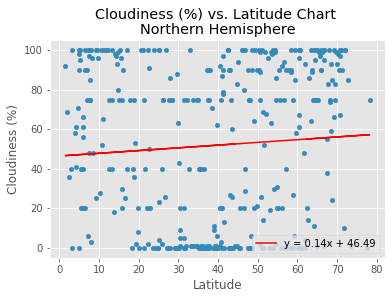

In [24]:
cloud_n = north_df['Cloudiness (%)']
lat_n = north_df['Latitude']

correlation = st.pearsonr(lat_n, cloud_n)

print('--------------------------')
print(f"The correlation between both factors (Cloudiness (%) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_n, cloud_n)
regress_values = lat_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
             title='Cloudiness (%) vs. Latitude Chart \nNorthern Hemisphere')    

plt.plot(lat_n, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_cloud_regresion_northern.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Cloudiness (%) and Latitude) is 0.0
--------------------------


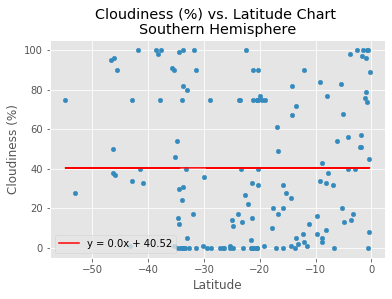

In [25]:
cloud_s = south_df['Cloudiness (%)']
lat_s = south_df['Latitude']

correlation = st.pearsonr(lat_s, cloud_s)

print('--------------------------')
print(f"The correlation between both factors (Cloudiness (%) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_s, cloud_s)
regress_values = lat_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
             title='Cloudiness (%) vs. Latitude Chart \nSouthern Hemisphere')    

plt.plot(lat_s, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_cloud_regresion_southern.png')
plt.show()

There is NO correlation between Cloudiness (%) and latitude on both hemispheres.

---

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Wind Speed (mph) and Latitude) is 0.18
--------------------------


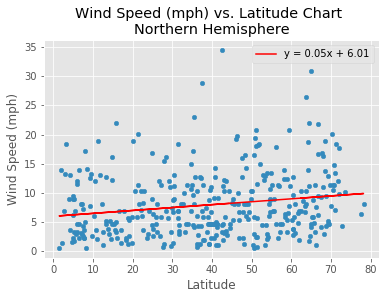

In [26]:
wind_n = north_df['Wind Speed (mph)']
lat_n = north_df['Latitude']

correlation = st.pearsonr(lat_n, wind_n)

print('--------------------------')
print(f"The correlation between both factors (Wind Speed (mph) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_n, wind_n)
regress_values = lat_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_df.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', 
             title='Wind Speed (mph) vs. Latitude Chart \nNorthern Hemisphere')    

plt.plot(lat_n, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_wind_regresion_northern.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

--------------------------
The correlation between both factors (Wind Speed (mph) and Latitude) is -0.2
--------------------------


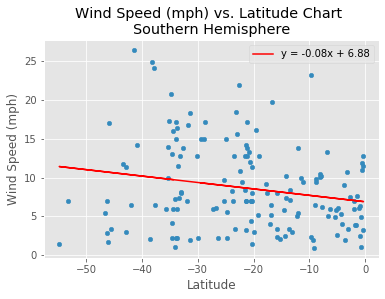

In [27]:
wind_s = south_df['Wind Speed (mph)']
lat_s = south_df['Latitude']

correlation = st.pearsonr(lat_s, wind_s)

print('--------------------------')
print(f"The correlation between both factors (Wind Speed (mph) and Latitude) is {round(correlation[0],2)}")
print('--------------------------')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_s, wind_s)
regress_values = lat_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_df.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', 
             title='Wind Speed (mph) vs. Latitude Chart \nSouthern Hemisphere')    

plt.plot(lat_s, regress_values, "r-", label=line_eq)
plt.legend()
plt.savefig('output_data/lat_vs_wind_regresion_southern.png')
plt.show()

There is NO correlation between Cloudiness (%) and latitude on both hemispheres.